In [1]:
#import ROOT
import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
import melp
import melp.taft

Welcome to JupyROOT 6.24/06


In [2]:
#import melp.legacy as melp

#test = melp.TileHitAngle("run42_20000.root", "outtest_1")
#test = melp.TileHitAngle("mu3e_run_050000.root", "outtest_big")

In [3]:
#mu3e_detector = dt.Detector(test.tile_id_pos, test.tile_id_pos, [0,1,2])

In [4]:
mu3e_detector = Detector.initFromROOT("run42_20000.root")
#mu3e_detector = Detector.initFromROOT("sorted_truth.root")
#mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
#mu3e_detector.save("test_detector_file")

In [6]:
melp.select(mu3e_detector)

In [7]:
melp.info()

Detector(TileDetector=<melp.src.tile.TileDetector object at 0x7f26284703d0>, SensorModules=<melp.src.sensor.SensorModule object at 0x7f262830eee0>))


In [8]:
print(mu3e_detector)

Detector(TileDetector=<melp.src.tile.TileDetector object at 0x7f26284703d0>, SensorModules=<melp.src.sensor.SensorModule object at 0x7f262830eee0>))


In [9]:
melp.addTileHits("run42_20000.root", truth=True, traj=True)

In [10]:
mu3e_detector.TileDetector.tile[200000].hits[2].trajectory


Trajectory(id=760728, v_pos=[5.845152474135161, 5.80241314929496, -1000.0], v_dir=[4.889830754746951, 0.642285775892458, 27.442700992405364], traj_type=3)

In [11]:
mu3e_detector.TileDetector.tile[200000].info()

------------------------------
Tile information

  - Tile ID:  200000
  - Position:  [59.828, -10.035394536951584, -566.915]
  - Direction:  [1.0, 0.0, 0.0]
  - Total Hits:  71
  - Truth Time Misal:  -3.995442484365776
------------------------------


In [12]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [42]
  - Loaded Runs (Pixel):  []
------------------------------


In [13]:
_ = melp.getHitRate()

In [14]:
melp.addSensorHits("run42_20000.root", traj=True)

In [15]:
hitangle = melp.getHitAngle(rec_type="Truth")

In [16]:
#print(hitangle[1])

In [17]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [42]
  - Loaded Runs (Pixel):  [42]
------------------------------


In [18]:
mu3e_detector.SensorsModules.sensor[1].hit

[Hit(edep=0, mc_i=0, tid=38873, frame_id=14, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 21.81733117,   7.67322029, -47.55      ])),
 Hit(edep=0, mc_i=0, tid=1905, frame_id=25, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 22.33778064,   6.41674413, -50.75      ])),
 Hit(edep=0, mc_i=0, tid=11355, frame_id=29, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 23.74605567,   3.01686745, -51.87      ])),
 Hit(edep=0, mc_i=0, tid=47079, frame_id=29, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 24.54203721,   1.09519802, -60.11      ])),
 Hit(edep=0, mc_i=0, tid=30790, frame_id=30, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 20.31721211,  11.29482806, -42.03      ])),
 Hit(edep=0, mc_i=0, tid=38324, frame_id=30, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 20.31721211,  11.29482806, -50.99      ])),
 Hit(edep=0, mc_i=0, tid=54839, frame_id=37, run_id=-1, hid=0, impact_vec=None, tra

In [19]:
mu3e_detector.TileDetector.tile[200000].hits

[Hit(edep=1.2783763906256802, mc_i=48476, tid=-1, frame_id=68, run_id=-1, hid=4, impact_vec=[-2.4933425810023024, 1.1216931355944117, -1.897180201694329], trajectory=Trajectory(id=43213, v_pos=[-9.531325830263711, -7.29623428021062, -1000.0], v_dir=[-3.1159462018793382, 0.17937529276270078, 26.966068037363783], traj_type=3), pos=None),
 Hit(edep=0.8387702474511345, mc_i=648003, tid=-1, frame_id=1028, run_id=-1, hid=2, impact_vec=[-28.489492176297436, 6.985334844529037, -29.964500814829577], trajectory=Trajectory(id=729528, v_pos=[3.2625302874650584, 15.610409518388408, -1000.0], v_dir=[4.067123634319109, -0.5266600953178076, 26.954953152715717], traj_type=3), pos=None),
 Hit(edep=0.11322953289494984, mc_i=653614, tid=-1, frame_id=1038, run_id=-1, hid=1, impact_vec=[-9.004092029847184, 4.668157302457942, 14.155976513043326], trajectory=Trajectory(id=760728, v_pos=[5.845152474135161, 5.80241314929496, -1000.0], v_dir=[4.889830754746951, 0.642285775892458, 27.442700992405364], traj_type=3

In [20]:
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

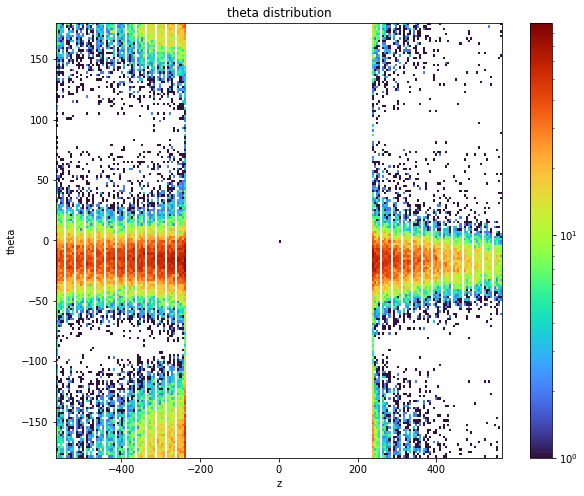

In [21]:
import numpy as np

fig = plt.figure(figsize=(10, 8))
import matplotlib as mpl
ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="turbo", norm = mpl.colors.LogNorm())
plt.ylabel("theta")
plt.xlabel("z")
plt.colorbar(im)
plt.show()